# Keras Tutorial: Deep Learning in Python
**This Keras tutorial introduces you to deep learning in Python: learn to preprocess your data, model, evaluate and optimize neural networks.**

![keras tutorial deep learning in python](graphics/figure1.png)

## Deep Learning

By now, you might already know machine learning, a branch in computer
science that studies the design of algorithms that can learn. Today,
you’re going to focus on deep learning, a subfield of machine learning
that is a set of algorithms that is inspired by the structure and
function of the brain. These algorithms are usually called Artificial
Neural Networks (ANN). Deep learning is one of the hottest fields in
data science with many case studies that have astonishing results in
robotics, image recognition and Artificial Intelligence (AI).

One of the most powerful and easy-to-use Python libraries for developing
and evaluating deep learning models is Keras; It wraps the efficient
numerical computation libraries Theano and TensorFlow. The advantage of
this is mainly that you can get started with neural networks in an easy
and fun way.
  



Today’s Keras tutorial for beginners will introduce you to the basics of
Python deep learning:

-   You’ll first learn what [Artificial Neural Networks](#ann) are

-   Then, the tutorial will show you step-by-step how to use Python and
    its libraries to [understand, explore and visualize your
    data](#Python),

-   How to [preprocess](#preprocess) your data: you’ll learn how to
    split up your data in train and test sets and how you can
    standardize your data,

-   How to [build up multi-layer perceptrons for classification
    tasks](#modeling),

-   How to [compile and fit](#compfit) the data to these models,

-   How to use your model to [predict target values](#predict), and

-   How to [validate the models](#validate) that you have built.

-   Lastly, you’ll also see how you can build up [a model for regression
    tasks](#finetune), and you’ll learn how you can fine-tune the model
    that you’ve built.

     

  

Would you like to take a course on Keras and deep learning in Python?
Consider taking DataCamp’s [Deep Learning in
Python](https://www.datacamp.com/courses/deep-learning-in-python)
course!

Also, don’t miss our [Keras cheat
sheet](https://www.datacamp.com/community/blog/keras-cheat-sheet), which
shows you the six steps that you need to go through to build neural
networks in Python with code examples!

## Introducing Artificial Neural Networks

Before going deeper into Keras and how you can use it to get started
with deep learning in Python, you should probably know a thing or two
about neural networks. As you briefly read in the previous section,
neural networks found their inspiration and biology, where the term
“neural network” can also be used for neurons. The human brain is then
an example of such a neural network, which is composed of a number of
neurons.

And, as you all know, the brain is capable of performing quite complex
computations, and this is where the inspiration for Artificial Neural
Networks comes from. The network as a whole is a powerful modeling tool.

### Perceptrons

The most simple neural network is the “perceptron”, which, in its
simplest form, consists of a single neuron. Much like biological
neurons, which have dendrites and axons, the single artificial neuron is
a simple tree structure which has input nodes and a single output node,
which is connected to each input node. Here’s a visual comparison of the
two:

![biological neurons vs artificial neural networks](graphics/figure2.png)

As you can see from the picture, there are six components to artificial
neurons. From left to right, these are:

1.  **Input nodes**. As it so happens, each input node is associated
    with a numerical value, which can be any real number. Remember that
    real numbers make up the full spectrum of numbers: they can be
    positive or negative, whole or decimal numbers.

2.  **Connections**. Similarly, each connection that departs from the
    input node has a weight associated with it, and this can also be any
    real number.

3.  Next, all the values of the input nodes and weights of the
    connections are brought together: they are used as inputs for a
    **weighted sum**: $\text{y}=\text{f}(\sum_{i=1}^{D} w_i * x_i)$, or, stated differently,
    $\text{} = f(w_1 * x_1 + w_2 * x_2 + \text{ ... }
    w_D * x_D))$.

4.  This result will be the input for a **transfer or activation
    function**. In the simplest but trivial case, this transfer function
    would be an identity function, $f(x)=x$ or $y=x$. In this case, $x$ is the weighted sum of the input
    nodes and the connections. However, just like a biological neuron
    only fires when a certain threshold is exceeded, the artificial
    neuron will also only fire when the sum of the inputs exceeds a
    threshold, let’s say for example 0. This is something that you can’t
    find back in an identity function! The most intuitive way that one
    can think of is by devising a system like the following:

    $(f(x) = 0)$ if $(x<0)$  
    $(f(x) = 0.5)$ if $(x=0)$  
    $(f(x) = 1)$ if $(x>0)$

5.  Of course, you can already imagine that the output is not going to
    be a smooth line: it will be a discontinuous function. Because this
    can cause problems in the mathematical processing, a continuous
    variant, the sigmoid function, is often used. An example of a
    sigmoid function that you might already know is the logistic
    function. Using this function results in a much smoother result!

6.  As a result, you have the **output node**, which is associated with
    the function (such as the sigmoid function) of the weighted sum of
    the input nodes. Note that the sigmoid function is a mathematical
    function that results in an “S” shaped curve; You’ll read more about
    this later.

7.  Lastly, the perceptron may be an additional parameter, called a
    **bias**, which you can consider as the weight associated with an
    additional input node that is permanently set to 1. The bias value
    is critical because it allows you to shift the activation function
    to the left or right, which can make a determine the success of your
    learning.

  

Note that the logical consequence of this model is that perceptrons only
work with numerical data. This implies that you should convert any
nominal data into a numerical format.

Now that you know that perceptrons work with thresholds, the step to
using them for classification purposes isn’t that far off: the
perceptron can agree that any output above a certain threshold indicates
that an instance belongs to one class, while an output below the
threshold might result in the input being a member of the other class.
The straight line where the output equals the threshold is then the
boundary between the two classes.

### Multi-Layer Perceptrons

Networks of perceptrons are multi-layer perceptrons, and this is what
this tutorial will implement in Python with the help of Keras!
Multi-layer perceptrons are also known as “feed-forward neural
networks”. As you sort of guessed by now, these are more complex
networks than the perceptron, as they consist of multiple neurons that
are organized in layers. The number of layers is usually limited to two
or three, but theoretically, there is no limit!

The layers act very much like the biological neurons that you have read
about above: the outputs of one layer serve as the inputs for the next
layer.

Among the layers, you can distinguish an input layer, hidden layers, and
an output layer. Multi-layer perceptrons are often fully connected. This
means that there’s a connection from each perceptron in a specific layer
to each perceptron in the next layer. Even though the connectedness is
no requirement, this is typically the case.

Note that while the perceptron could only represent linear separations
between classes, the multi-layer perceptron overcomes that limitation
and can also represent more complex decision boundaries.

## Predicting Wine Types: Red or White?

For this tutorial, you’ll use the wine quality data set that you can
find in the [wine quality data set]() from the UCI Machine Learning
Repository. Ideally, you perform deep learning on bigger data sets, but
for the purpose of this tutorial, you will make use of a smaller one.
This is mainly because the goal is to get you started with the library
and to familiarize yourself with how neural networks work.

You might already know this data set, as it’s one of the most popular
data sets to get started on learning how to work out machine learning
problems. In this case, it will serve for you to get started with deep
learning in Python with Keras.

Let’s get started now!

### Understanding The Data

However, before you start loading in the data, it might be a good idea
to check how much you really know about wine (in relation to the
dataset, of course). Most of you will know that there are, in general,
two very popular types of wine: red and white.

(I’m sure that there are many others, but for simplicity and because of
my limited knowledge of wines, I’ll keep it at this. I’m sorry if I’m
disappointing the true connoisseurs among you :)).

Knowing this is already one thing, but if you want to analyze this data,
you will need to know just a little bit more.

First, check out the data description folder to see which variables have
been included. This is usually the first step to understanding your
data. Go to [this page](http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality.names)
to check out the description or keep on reading to get to know your data
a little bit better.

The data consists of two datasets that are related to red and white
variants of the Portuguese “Vinho Verde” wine. As stated in the
description, you’ll only find physicochemical and sensory variables
included in this data set. The data description file lists the 12
variables that are included in the data, but for those who, like me,
aren’t really chemistry experts either, here’s a short description of
each variable:

1.  *Fixed acidity*: acids are major wine properties and contribute
    greatly to the wine’s taste. Usually, the total acidity is divided
    into two groups: the volatile acids and the nonvolatile or fixed
    acids. Among the fixed acids that you can find in wines are the
    following: tartaric, malic, citric, and succinic. This variable is
    expressed in $\text{g(tartaric acid)}/(dm^3)$ in the
    data sets.
2.  *Volatile acidity*: the volatile acidity is basically the process of
    wine turning into vinegar. In the U.S, the legal limits of Volatile
    Acidity are 1.2 g/L for red table wine and 1.1 g/L for white table
    wine. In these data sets, the volatile acidity is expressed in
    $\text{g(acetic acid)}/(dm^3)$.
3.  *Citric acid* is one of the fixed acids that you’ll find in wines.
    It’s expressed in $\text{g}/(\text{dm}^3)$ in
    the two data sets.
4.  *Residual sugar* typically refers to the sugar remaining after
    fermentation stops, or is stopped. It’s expressed in $\text{g}/(\text{dm}^3)$ in the `red` and `white` data.
5.  *Chlorides* can be a significant contributor to saltiness in wine.
    Here, you’ll see that it’s expressed in $\text{g(sodium chloride)}/(\text{dm}^3)$.
6.  *Free sulfur dioxide*: the part of the sulfur dioxide that is added
    to a wine and that is lost into it is said to be bound, while the
    active part is said to be free. The winemaker will always try to get
    the highest proportion of free sulfur to bind. This variable is
    expressed in $\text{mg}/(\text{dm}^3)$ in the
    data.
7.  *Total sulfur dioxide* is the sum of the bound and the free sulfur
    dioxide (SO2). Here, it’s expressed in $\text{mg}/(\text{dm}^3)$. There are legal limits for
    sulfur levels in wines: in the EU, red wines can only have 160mg/L,
    while white and rose wines can have about 210mg/L. Sweet wines are
    allowed to have 400mg/L. For the US, the legal limits are set at
    350mg/L, and for Australia, this is 250mg/L.
8.  *Density* is generally used as a measure of the conversion of sugar
    to alcohol. Here, it’s expressed in $\text{g}/(\text{cm}^3)$.
9.  *pH* or the potential of hydrogen is a numeric scale to specify the
    acidity or basicity the wine. As you might know, solutions with a pH
    less than 7 are acidic, while solutions with a pH greater than 7 are
    basic. With a pH of 7, pure water is neutral. Most wines have a pH
    between 2.9 and 3.9 and are therefore acidic.
10. *Sulfates* are to wine as gluten is to food. You might already know
    sulfites from the headaches that they can cause. They are a regular
    part of the winemaking around the world and are considered
    necessary. In this case, they are expressed in $\text{g(potassium sulphate)}/(\text{dm}^3)$.
11. *Alcohol*: wine is an alcoholic beverage, and as you know, the
    percentage of alcohol can vary from wine to wine. It shouldn’t be
    surprised that this variable is included in the data sets, where
    it’s expressed in % vol.
12. *Quality*: wine experts graded the wine quality between 0 (very bad)
    and 10 (very excellent). The eventual number is the median of at
    least three evaluations made by those same wine experts.

  

This all, of course, is some very basic information that you might need
to know to get started. If you’re a true wine connoisseur, you probably
know all of this and more!

Now, it’s time to get your data!

### Loading In The Data

This can be easily done with the Python data manipulation library
Pandas. You follow the import convention and import the package under
its alias, `pd`.

Next, you make use of the `read_csv()` function to read in the CSV files
in which the data is stored. Additionally, use the `sep` argument to
specify that the separator, in this case, is a semicolon and not a
regular comma.


In [1]:
# Import pandas 
import pandas as pd

# Read in white wine data 
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')

# Read in red wine data 
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

Awesome! That was a piece of cake, wasn’t it?

You have probably done this a million times by now, but it’s always an
essential step to get started. Now you’re completely set to begin
exploring, manipulating and modeling your data!

## Data Exploration

With the data at hand, it’s easy for you to learn more about these
wines! One of the first things that you’ll probably want to do is to
start with getting a quick view on both of your DataFrames:

In [2]:
# Print info on white wine
print(white.info())

# Print info on red wine
print(red.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column   

Now is the time to check whether your import was successful: double
check whether the data contains all the variables that the data
description file of the UCI Machine Learning Repository promised you.
Besides the number of variables, also check the quality of the import:
are the data types correct? Did all the rows come through? Are there any
null values that you should take into account when you’re cleaning up
the data?

You might also want to check out your data with more than just `info()`:


In [3]:
# First rows of `red` 
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Last rows of `white`
white.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [5]:
# Take a sample of 5 rows of `red`
red.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
217,8.1,0.725,0.22,2.2,0.072,11.0,41.0,0.99670,3.36,0.55,9.10,5
164,7.3,0.590,0.26,7.2,0.070,35.0,121.0,0.99810,3.37,0.49,9.40,5
1063,10.2,0.290,0.65,2.4,0.075,6.0,17.0,0.99565,3.22,0.63,11.80,6
1200,7.7,0.570,0.21,1.5,0.069,4.0,9.0,0.99458,3.16,0.54,9.80,6
1396,8.7,0.675,0.10,1.6,0.090,4.0,11.0,0.99745,3.31,0.65,9.55,5


In [6]:
# Describe `white`
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [7]:
# Double check for null values in `red`
pd.isnull(red)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


A brief recap of all these pandas functions: you see that `head()`,
`tail()` and `sample()` are fantastic because they provide you with a
quick way of inspecting your data without any hassle.

Next, `describe()` offers some summary statistics about your data that
can help you to assess your data quality. You see that some of the
variables have a lot of difference in their `min` and `max` values. This
is something that you’ll deal with later, but at this point, it’s just
imperative to be aware of this.

Lastly, you have double checked the presence of null values in `red`
with the help of `isnull()`. This is a function that always can come in
handy when you’re still in doubt after having read the results of
`info()`.

**Tip**: also check out whether the wine data contains null values. 

Now that you have already inspected your data to see if the import was
successful and correct, it’s time to dig a little bit deeper.

### Visualizing The Data

One way to do this is by looking at the distribution of some of the
dataset’s variables and make scatter plots to see possible correlations.
Of course, you can take this all to a much higher level if you would use
this data for your own project.

### Alcohol

One variable that you could find interesting at first sight is
`alcohol`. It’s probably one of the first things that catches your
attention when you’re inspecting a wine data set. You can visualize the
distributions with any data visualization library, but in this case, the
tutorial makes use of `matplotlib` to plot the distributions quickly:



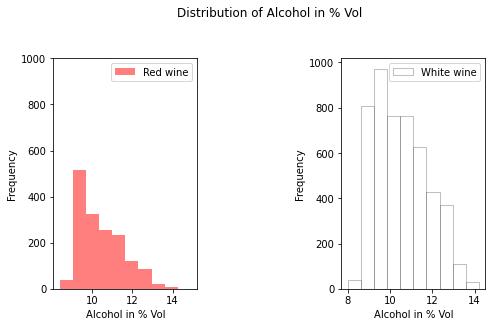

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2)

ax[0].hist(red.alcohol, 10, facecolor='red', alpha=0.5, label="Red wine")
ax[1].hist(white.alcohol, 10, facecolor='white', ec="black", lw=0.5, alpha=0.5, label="White wine")

fig.subplots_adjust(left=0, right=1, bottom=0, top=0.8, hspace=0.05, wspace=1)
ax[0].set_ylim([0, 1000])
ax[0].set_xlabel("Alcohol in % Vol")
ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("Alcohol in % Vol")
ax[1].set_ylabel("Frequency")
ax[0].legend(loc='best')
ax[1].legend(loc='best')
fig.suptitle("Distribution of Alcohol in % Vol")

plt.show()

As you can see in the image below, you see that the alcohol levels
between the red and white wine are mostly the same: they have around 9%
of alcohol. Of course, there are also a considerable amount of
observations that have 10% or 11% of alcohol percentage.


Note that you can double check this if you use the `histogram()`
function from the `numpy` package to compute the histogram of the
`white` and `red` data, just like this:



In [9]:
import numpy as np

print(np.histogram(red.alcohol, bins=[7,8,9,10,11,12,13,14,15]))
print(np.histogram(white.alcohol, bins=[7,8,9,10,11,12,13,14,15]))

(array([  0,   7, 673, 452, 305, 133,  21,   8]), array([ 7,  8,  9, 10, 11, 12, 13, 14, 15]))
(array([   0,  317, 1606, 1256,  906,  675,  131,    7]), array([ 7,  8,  9, 10, 11, 12, 13, 14, 15]))


If you’re interested in `matplotlib` tutorials, make sure to check out
DataCamp’s
[Matplotlib](https://www.datacamp.com/community/tutorials/matplotlib-tutorial-python)
tutorial for beginners and [Viewing 3D Volumetric
Data](https://www.datacamp.com/community/tutorials/matplotlib-3d-volumetric-data)
tutorial, which shows you how to make use of Matplotlib’s event handler
API.

### Sulfates

Next, one thing that interests me is the relation between the sulfates
and the quality of the wine. As you have read above, sulfates can cause
people to have headaches, and I’m wondering if this influences the
quality of the wine. What’s more, I often hear that women especially
don’t want to drink wine precisely because it causes headaches. Maybe
this affects the ratings for the red wine?

Let’s take a look.



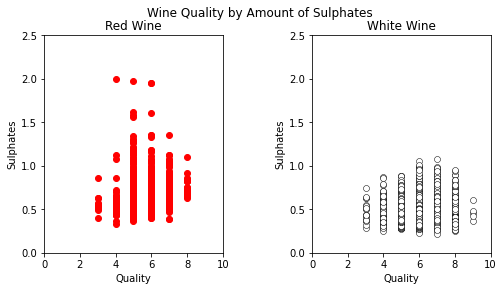

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].scatter(red['quality'], red["sulphates"], color="red")
ax[1].scatter(white['quality'], white['sulphates'], color="white", edgecolors="black", lw=0.5)

ax[0].set_title("Red Wine")
ax[1].set_title("White Wine")
ax[0].set_xlabel("Quality")
ax[1].set_xlabel("Quality")
ax[0].set_ylabel("Sulphates")
ax[1].set_ylabel("Sulphates")
ax[0].set_xlim([0,10])
ax[1].set_xlim([0,10])
ax[0].set_ylim([0,2.5])
ax[1].set_ylim([0,2.5])
fig.subplots_adjust(wspace=0.5)
fig.suptitle("Wine Quality by Amount of Sulphates")

plt.show()

As you can see in the image below, the red wine seems to contain more
sulfates than the white wine, which has fewer sulfates above 1 g/<span
class="math inline">\\(dm^3\\)</span>. For the white wine, there only
seem to be a couple of exceptions that fall just above 1 g/<span
class="math inline">\\(dm^3\\)</span>, while this is definitely more for
the red wines. This could maybe explain the general saying that red wine
causes headaches, but what about the quality?

You can clearly see that there is white wine with a relatively low
amount of sulfates that gets a score of 9, but for the rest, it’s
difficult to interpret the data correctly at this point.

Of course, you need to take into account that the difference in
observations could also affect the graphs and how you might interpret
them.

  

### Acidity

Apart from the sulfates, the acidity is one of the major and vital wine
characteristics that is necessary to achieve quality wines. Great wines
often balance out acidity, tannin, alcohol, and sweetness. Some more
research taught me that in quantities of 0.2 to 0.4 g/L, volatile
acidity doesn’t affect a wine’s quality. At higher levels, however,
volatile acidity can give the wine a sharp, vinegary tactile sensation.
Extreme volatile acidity signifies a seriously flawed wine.

Let’s put the data to the test and make a scatter plot that plots the
alcohol versus the volatile acidity. The data points should be colored
according to their rating or `quality` label:



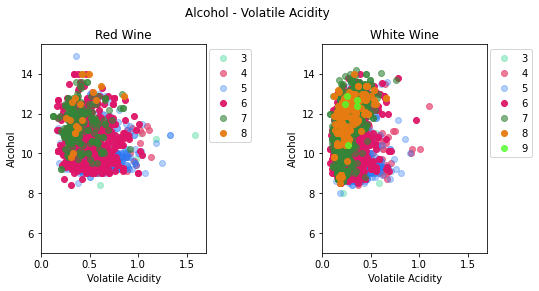

In [11]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(570)

redlabels = np.unique(red['quality'])
whitelabels = np.unique(white['quality'])

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
redcolors = np.random.rand(6,4)
whitecolors = np.append(redcolors, np.random.rand(1,4), axis=0)

for i in range(len(redcolors)):
    redy = red['alcohol'][red.quality == redlabels[i]]
    redx = red['volatile acidity'][red.quality == redlabels[i]]
    ax[0].scatter(redx, redy, color=redcolors[i])

for i in range(len(whitecolors)):
    whitey = white['alcohol'][white.quality == whitelabels[i]]
    whitex = white['volatile acidity'][white.quality == whitelabels[i]]
    ax[1].scatter(whitex, whitey, color=whitecolors[i])
    
ax[0].set_title("Red Wine")
ax[1].set_title("White Wine")
ax[0].set_xlim([0,1.7])
ax[1].set_xlim([0,1.7])
ax[0].set_ylim([5,15.5])
ax[1].set_ylim([5,15.5])
ax[0].set_xlabel("Volatile Acidity")
ax[0].set_ylabel("Alcohol")
ax[1].set_xlabel("Volatile Acidity")
ax[1].set_ylabel("Alcohol") 
ax[0].legend(redlabels, loc='best', bbox_to_anchor=(1.3, 1))
ax[1].legend(whitelabels, loc='best', bbox_to_anchor=(1.3, 1))
fig.suptitle("Alcohol - Volatile Acidity")
fig.subplots_adjust(top=0.85, wspace=0.7)

plt.show()

Note that the colors in this image are randomly chosen with the help of
the NumPy `random` module. You can always change this by passing a list
to the `redcolors` or `whitecolors` variables. Make sure that they are
the same (except for 1 because the white wine data has one unique
`quality` value more than the red wine data), though, otherwise your
legends are not going to match!

Check out the full graph here:


In the image above, you see that the levels that you have read about
above especially hold for the white wine: most wines with label 8 have
volatile acidity levels of 0.5 or below, but whether or not it has an
effect on the quality is too difficult to say, since all the data points
are very densely packed towards one side of the graph.

This is just a quick data exploration. If you would be interested in
elaborating this step in your own projects, consider DataCamp’s data
exploration posts, such as [Python Exploratory Data
Analysis](https://www.datacamp.com/community/tutorials/exploratory-data-analysis-python)
and [Python Data
Profiling](https://www.datacamp.com/community/tutorials/python-data-profiling)
tutorials, which will guide you through the basics of EDA.

### Wrapping Up The Exploratory Data Analysis

This maybe was a lot to digest, so it’s never too late for a small recap
of what you have seen during your EDA that could be important for the
further course of this tutorial:

-   Some of the variables of your data sets have values that are
    considerably far apart. You can and will deal with this in the next
    section of the tutorial.
-   You have an ideal scenario: there are no null values in the data
    sets.
-   Most wines that were included in the data set have around 9% of
    alcohol.
-   Red wine seems to contain more sulphates than the white wine, which
    has less sulphates above 1 g/<span
    class="math inline">\\(dm^3\\)</span>.
-   You saw that most wines had a volatile acidity of 0.5 and below. At
    the moment, there is no direct relation to the quality of the wine.

  

Up until now, you have looked at the white wine and red wine data
separately. The two seem to differ somewhat when you look at some of the
variables from close up, and in other cases, the two seem to be very
similar. Do you think that there could there be a way to classify
entries based on their variables into white or red wine?

There is only one way to find out: preprocess the data and model it in
such a way so that you can see what happens!

## Preprocess Data

Now that you have explored your data, it’s time to act upon the insights
that you have gained! Let’s preprocess the data so that you can start
building your own neural network!



In [12]:
# Add `type` column to `red` with value 1
red['type'] = 1

# Add `type` column to `white` with value 0
white['type'] = 0

# Append `white` to `red`
wines = red.append(white, ignore_index=True)

You set `ignore_index` to `True` in this case because you don’t want to
keep the index labels of `white` when you’re appending the data to
`red`: you want the labels to continue from where they left off in
`red`, not duplicate index labels from joining both data sets together.

### Intermezzo: Correlation Matrix

Now that you have the full data set, it’s a good idea to also do a quick
data exploration; You already know some stuff from looking at the two
data sets separately, and now it’s time to gather some more solid
insights, perhaps.

Since it can be somewhat difficult to interpret graphs, it’s also a good
idea to plot a correlation matrix. This will give insights more quickly
about which variables correlate:



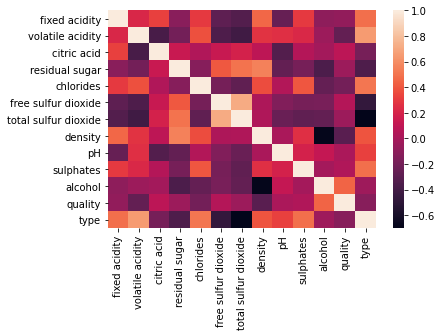

In [13]:
import seaborn as sns

corr = wines.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

As you would expect, there are some variables that correlate, such as
`density` and `residual sugar`. Also `volatile acidity` and `type` are
more closely connected than you originally could have guessed by looking
at the two data sets separately, and it was kind of to be expected that
`free sulfur dioxide` and `total sulfur dioxide` were going to
correlate.
  

Very interesting!

### Train and Test Sets

Imbalanced data typically refers to a problem with classification
problems where the classes are not represented equally.Most
classification data sets do not have exactly equal number of instances
in each class, but a small difference often does not matter. You thus
need to make sure that all two classes of wine are present in the
training model. What’s more, the amount of instances of all two wine
types needs to be more or less equal so that you do not favour one or
the other class in your predictions.

In this case, there seems to be an imbalance, but you will go with this
for the moment. Afterwards, you can evaluate the model and if it
underperforms, you can resort to undersampling or oversampling to cover
up the difference in observations.

For now, import the `train_test_split` from `sklearn.model_selection`
and assign the data and the target labels to the variables `X` and `y`.
You’ll see that you need to flatten the array of target labels in order
to be totally ready to use the `X` and `y` variables as input for the
`train_test_split()` function. Off to work, get started in the DataCamp
Light chunk below!

In [14]:
# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split

# Specify the data 
X = wines.iloc[:,0:11]

# Specify the target labels and flatten the array
y = np.ravel(wines.type)

# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

You’re already well on your way to build your first neural network, but
there is still one thing that you need to take care of! Do you still
know what you discovered when you were looking at the summaries of the
`white` and `red` data sets?

Indeed, some of the values were kind of far apart. It might make sense
to do some standardization here.

### Standardize The Data

Standardization is a way to deal with these values that lie so far
apart. The scikit-learn package offers you a great and quick way of
getting your data standardized: import the `StandardScaler` module from
`sklearn.preprocessing` and you’re ready to scale your train and test
data!

In [15]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)



Now that you’re data is preprocessed, you can move on to the real work:
building your own neural network to classify wines.

## Model Data

Before you start modeling, go back to your original question: can you
predict whether a wine is red or white by looking at its chemical
properties, such as volatile acidity or sulphates?

Since you only have two classes, namely white and red, you’re going to
do a binary classification. As you can imagine, “binary” means 0 or 1,
yes or no. Since neural networks can only work with numerical data, you
have already encoded red as 1 and white as 0.

A type of network that performs well on such a problem is a multi-layer
perceptron. As you have read in the beginning of this tutorial, this
type of neural network is often fully connected. That means that you’re
looking to build a fairly simple stack of fully-connected layers to
solve this problem. As for the activation function that you will use,
it’s best to use one of the most common ones here for the purpose of
getting familiar with Keras and neural networks, which is the relu
activation function.

Now how do you start building your multi-layer perceptron? A quick way
to get started is to use the Keras Sequential model: it’s a linear stack
of layers. You can easily create the model by passing a list of layer
instances to the constructor, which you set up by running
`model = Sequential()`.

Next, it’s best to think back about the structure of the multi-layer
perceptron as you might have read about it in the beginning of this
tutorial: you have an input layer, some hidden layers and an output
layer. When you’re making your model, it’s therefore important to take
into account that your first layer needs to make the input shape clear.
The model needs to know what input shape to expect and that’s why you’ll
always find the `input_shape`, `input_dim`, `input_length`, or
`batch_size` arguments in the documentation of the layers and in
practical examples of those layers.

In this case, you will have to use a `Dense` layer, which is a fully
connected layer. Dense layers implement the following operation:
`output = activation(dot(input, kernel) + bias)`. Note that without the
activation function, your Dense layer would consist only of two linear
operations: a dot product and an addition.

In the first layer, the `activation` argument takes the value `relu`.
Next, you also see that the `input_shape` has been defined. This is the
`input` of the operation that you have just seen: the model takes as
input arrays of shape `(12,)`, or `(*, 12)`. Lastly, you see that the
first layer has `12` as a first value for the `units` argument of
`Dense()`, which is the dimensionality of the output space and which are
actually 12 hidden units. This means that the model will output arrays
of shape `(*, 12)`: this is is the dimensionality of the output space.
Don’t worry if you don’t get this entirely just now, you’ll read more
about it later on!

The `units` actually represents the `kernel` of the above formula or the
weights matrix, composed of all weights given to all input nodes,
created by the layer. Note that you don’t include any bias in the
example below, as you haven’t included the `use_bias` argument and set
it to `TRUE`, which is also a possibility.

The intermediate layer also uses the `relu` activation function. The
output of this layer will be arrays of shape `(*,8)`.

You are ending the network with a `Dense` layer of size 1. The final
layer will also use a sigmoid activation function so that your output is
actually a probability; This means that this will result in a score
between 0 and 1, indicating how likely the sample is to have the target
“1”, or how likely the wine is to be red.



In [16]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(12, activation='relu', input_shape=(11,)))

# Add one hidden layer 
model.add(Dense(8, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

All in all, you see that there are two key architecture decisions that
you need to make to make your model: how many layers you’re going to use
and how many “hidden units” you will chose for each layer.

In this case, you picked `12` hidden units for the first layer of your
model: as you read above, this is is the dimensionality of the output
space. In other words, you’re setting the amount of freedom that you’re
allowing the network to have when it’s learning representations. If you
would allow more hidden units, your network will be able to learn more
complex representations but it will also be a more expensive operations
that can be prone to overfitting.

Remember that overfitting occurs when the model is too complex: it will
describe random error or noise and not the underlying relationship that
it needs to describe. In other words, the training data is modeled too
well!

Note that when you don’t have that much training data available, you
should prefer to use a small network with very few hidden layers
(typically only one, like in the example above).

If you want to get some information on the model that you have just
created, you can use the attributed `output_shape` or the `summary()`
function, among others. Some of the most basic ones are listed below.

Try running them to see what results you exactly get back and what they
tell you about the model that you have just created:



In [17]:
# Model output shape
model.output_shape

# Model summary
model.summary()

# Model config
model.get_config()

# List all weight tensors 
model.get_weights()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                144       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


[array([[-0.24445075, -0.20141974,  0.22297078,  0.21997356,  0.49284297,
          0.2660393 ,  0.19030535,  0.13110155, -0.458658  , -0.2276324 ,
         -0.29383734,  0.18288767],
        [-0.3099898 , -0.22164896, -0.03013521, -0.48413223,  0.1256932 ,
          0.40705585, -0.45054522,  0.19008255, -0.04302102,  0.4382885 ,
          0.01278633, -0.41910034],
        [ 0.34763187, -0.11575031, -0.3974795 , -0.12429515, -0.41487968,
         -0.38651466,  0.41826034,  0.33524787,  0.06655943, -0.34475827,
         -0.5099116 ,  0.5049153 ],
        [-0.34489346,  0.51050097,  0.49787158, -0.28884524,  0.20741588,
          0.4544819 ,  0.49330992, -0.4927014 , -0.27263492,  0.1676848 ,
          0.16973823, -0.5021062 ],
        [ 0.1863581 , -0.14038894, -0.24525565, -0.20890647, -0.331003  ,
         -0.46917263, -0.26024607, -0.19682011, -0.03250054, -0.39173084,
          0.28572774, -0.0670453 ],
        [ 0.3863992 , -0.46143442, -0.4990403 , -0.43482286,  0.12343919,
      

## Compile and Fit

Next, it’s time to compile your model and fit the model to the data:
once again, make use of `compile()` and `fit()` to get this done.

    model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=0)

In compiling, you configure the model with the `adam` optimizer and the
`binary_crossentropy` loss function. Additionally, you can also monitor
the accuracy during the training by passing `['accuracy']` to the
`metrics` argument.

The `optimizer` and the `loss` are two arguments that are required if
you want to compile the model. Some of the most popular optimization
algorithms used are the Stochastic Gradient Descent (SGD), ADAM and
RMSprop. Depending on whichever algorithm you choose, you’ll need to
tune certain parameters, such as learning rate or momentum. The choice
for a loss function depends on the task that you have at hand: for
example, for a regression problem, you’ll usually use the Mean Squared
Error (MSE). As you see in this example, you used `binary_crossentropy`
for the binary classification problem of determining whether a wine is
red or white. Lastly, with multi-class classification, you’ll make use
of `categorical_crossentropy`.

After, you can train the model for 20 epochs or iterations over all the
samples in `X_train` and `y_train`, in batches of 1 sample. You can also
specify the `verbose` argument. By setting it to `1`, you indicate that
you want to see progress bar logging.

In other words, you have to train the model for a specified number of
epochs or exposures to the training dataset. An epoch is a single pass
through the entire training set, followed by testing of the verification
set. The batch size that you specify in the code above defines the
number of samples that going to be propagated through the network. Also,
by doing this, you optimize the efficiency because you make sure that
you don’t load too many input patterns into memory at the same time.


## Predict Values

Let’s put your model to use! You can make predictions for the labels of
the test set with it. Just use `predict()` and pass the test set to it
to predict the labels for the data. In this case, the result is stored
in `y_pred`:

Before you go and evaluate your model, you can already get a quick idea
of the accuracy by checking how `y_pred` and `y_test` compare:

    y_pred[:5]

    array([[0],
           [1],
           [0],
           [0],
           [0]], dtype=int32)

    y_test[:5]

    array([0, 1, 0, 0, 0])

You see that these values seem to add up, but what is all of this
without some hard numbers?

## Evaluate Model

Now that you have built your model and used it to make predictions on
data that your model hadn’t seen yet, it’s time to evaluate its
performance. You can visually compare the predictions with the actual
test labels (`y_test`), or you can use all types of metrics to determine
the actual performance. In this case, you’ll use `evaluate()` to do
this. Pass in the test data and test labels and if you want, put the
`verbose` argument to 1. You’ll see more logs appearing when you do
this.

    score = model.evaluate(X_test, y_test,verbose=1)

    print(score)
    
    [0.025217213829228164, 0.99487179487179489]

The score is a list that holds the combination of the loss and the
accuracy. In this case, you see that both seem very great, but in this
case it’s good to remember that your data was somewhat imbalanced: you
had more white wine than red wine observations. The accuracy might just
be reflecting the class distribution of your data because it’ll just
predict `white` because those observations are abundantly present!

Before you start re-arranging the data and putting it together in a
different way, it’s always a good idea to try out different evaluation
metrics. For this, you can rely on scikit-learn (which you import as
`sklearn`, just like before when you were making the train and test
sets) for this.

In this case, you will test out some basic classification evaluation
techniques, such as:

-   The confusion matrix, which is a breakdown of predictions into a
    table showing correct predictions and the types of incorrect
    predictions made. Ideally, you will only see numbers in the
    diagonal, which means that all your predictions were correct!
-   Precision is a measure of a classifier’s exactness. The higher the
    precision, the more accurate the classifier.
-   Recall is a measure of a classifier’s completeness. The higher the
    recall, the more cases the classifier covers.
-   The F1 Score or F-score is a weighted average of precision and
    recall.
-   The Kappa or Cohen’s kappa is the classification accuracy normalized
    by the imbalance of the classes in the data.



    # Import the modules from `sklearn.metrics`
    from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score

    # Confusion matrix
    confusion_matrix(y_test, y_pred)

    array([[1585,    3],
           [   8,  549]])

    # Precision 
    precision_score(y_test, y_pred)

    0.994565217391

    # Recall
    recall_score(y_test, y_pred)

    0.98563734290843807

    # F1 score
    f1_score(y_test,y_pred)

    0.99008115419296661

    # Cohen's kappa
    cohen_kappa_score(y_test, y_pred)

    0.98662321692498967

All these scores are very good! You have made a pretty accurate model
despite the fact that you have considerably more rows that are of the
white wine type.

Good job!

## Some More Experiments

You’ve successfully built your first model, but you can go even further
with this one. Why not try out the following things and see what their
effect is? Like you read above, the two key architectural decisions that
you need to make involve the layers and the hidden nodes. These are
great starting points:

-   You used 1 hidden layers. Try to use 2 or 3 hidden layers;
-   Use layers with more hidden units or less hidden units;
-   Take the `quality` column as the target labels and the rest of the
    data (including the encoded `type` column!) as your data. You now
    have a multi-class classification problem!

  

But why also not try out changing the activation function? Instead of
`relu`, try using the `tanh` activation function and see what the result
is!

## Predicting Wine Quality

Your classification model performed perfectly for a first run!

But there is so much more that you can do besides going a level higher
and trying out more complex structures than the multi-layer perceptron.
Why not try to make a neural network to predict the wine quality?

In this case, the tutorial assumes that `quality` is a continuous
variable: the task is then not a binary classification task but an
ordinal regression task. It’s a type of regression that is used for
predicting an ordinal variable: the `quality` value exists on an
arbitrary scale where the relative ordering between the different
`quality` values is significant. In this scale, the quality scale 0-10
for “very bad” to “very good” is such an example.

Note that you could also view this type of problem as a classification
problem and consider the quality labels as fixed class labels.

In any case, this situation setup would mean that your target labels are
going to be the `quality` column in your `red` and `white` DataFrames
for the second part of this tutorial. This will require some additional
preprocessing.

### Preprocess Data

Since the `quality` variable becomes your target class, you will now
need to isolate the quality labels from the rest of the data set. You
will put `wines.quality` in a different variable `y` and you’ll put the
wines data, with exception of the `quality` column in a variable `x`.

Next, you’re ready to split the data in train and test sets, but you
won’t follow this approach in this case (even though you could!). In
this second part of the tutorial, you will make use of k-fold
validation, which requires you to split up the data into K partitions.
Usually, K is set at 4 or 5. Next, you instantiate identical models and
train each one on a partition, while also evaluating on the remaining
partitions. The validation score for the model is then an average of the
K validation scores obtained.

You’ll see how to do this later. For now, use `StandardScaler` to make
sure that your data is in a good place before you fit the data to the
model, just like before.


In [18]:
# Isolate target labels
y = wines.quality

# Isolate data
X = wines.drop('quality', axis=1) 

Remember that you also need to perform the scaling again because you had
a lot of differences in some of the values for your `red`, `white` (and
consequently also `wines`) data.

In [19]:
# Scale the data with `StandardScaler`
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

Now you’re again at the point where you were a bit ago. You can again
start modeling the neural network!

### Model Neural Network Architecture

Now that you have preprocessed the data again, it’s once more time to
construct a neural network model, a multi-layer perceptron. Even though
you’ll use it for a regression task, the architecture could look very
much the same, with two `Dense` layers.

Don’t forget that the first layer is your input layer. You will need to
pass the shape of your input data to it. In this case, you see that
you’re going to make use of `input_dim` to pass the dimensions of the
input data to the `Dense` layer.



In [20]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the model
model = Sequential()

# Add input layer 
model.add(Dense(64, input_dim=12, activation='relu'))
    
# Add output layer 
model.add(Dense(1))

Note again that the first layer that you define is the input layer. This
layer needs to know the input dimensions of your data. You pass in the
input dimensions, which are 12 in this case (don’t forget that you’re
also counting the `Type` column which you have generated in the first
part of the tutorial!). You again use the `relu` activation function,
but once again there is no bias involved. The number of hidden units is
`64`.

Your network ends with a single unit `Dense(1)`, and doesn’t include an
activation. This is a typical setup for scalar regression, where you are
trying to predict a single continuous value).

### Compile The Model, Fit The Data

With your model at hand, you can again compile it and fit the data to
it. But wait. Don’t you need the K fold validation partitions that you
read about before? That’s right.

    import numpy as np
    from sklearn.model_selection import StratifiedKFold

    seed = 7
    np.random.seed(seed)

    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
    for train, test in kfold.split(X, Y):
        model = Sequential()
        model.add(Dense(64, input_dim=12, activation='relu'))
        model.add(Dense(1))
        model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
        model.fit(X[train], Y[train], epochs=10, verbose=1)

Use the `compile()` function to compile the model and then use `fit()`
to fit the model to the data. To compile the model, you again make sure
that you define at least the `optimizer` and `loss` arguments. In this
case, you can use `rsmprop`, one of the most popular optimization
algorithms, and `mse` as the loss function, which is very typical for
regression problems such as yours.

The additional `metrics` argument that you define is actually a function
that is used to judge the performance of your model. For regression
problems, it’s prevalent to take the Mean Absolute Error (MAE) as a
metric. You’ll read more about this in the next section.

Pass in the train data and labels to `fit()`, determine how many epochs
you want to run the fitting, the batch size and if you want, you can put
the `verbose` argument to 1 to get more logs because this can take up
some time.

### Evaluate Model

Just like before, you should also evaluate your model. Besides adding
`y_pred = model.predict(X[test])` to the rest of the code above, it
might also be a good idea to use some of the evaluation metrics from
`sklearn`, like you also have done in the first part of the tutorial.

To do this, you can make use of the Mean Squared Error (MSE) and the
Mean Absolute Error (MAE). The former, which is also called the “mean
squared deviation” (MSD) measures the average of the squares of the
errors or deviations. In other words, it quantifies the difference
between the estimator and what is estimated. This way, you get to know
some more about the quality of your estimator: it is always
non-negative, and values closer to zero are better.

The latter evaluation measure, MAE, stands for Mean Absolute Error: it
quantifies how close predictions are to the eventual outcomes.

Add these lines to the previous code chunk, and be careful with the
indentations:

    mse_value, mae_value = model.evaluate(X[test], Y[test], verbose=0)

    print(mse_value)

    0.522478731072

    print(mae_value)

    0.561965950103

Note that besides the MSE and MAE scores, you could also use the R2
score or the regression score function. Here, you should go for a score
of 1.0, which is the best. However, the score can also be negative!

    from sklearn.metrics import r2_score

    r2_score(Y[test], y_pred)

    0.3125092543

At first sight, these are quite horrible numbers, right? The good thing
about this, though, is that you can now experiment with optimizing the
code so that the results become a little bit better.

That’s what the next and last section is all about!

### Model Fine-Tuning

Fine-tuning your model is probably something that you’ll be doing a lot
because not all problems are as straightforward as the one that you saw
in the first part of this tutorial. As you read above, there are already
two critical decisions that you’ll probably want to adjust: how many
layers you’re going to use and how many “hidden units” you will choose
for each layer.

In the beginning, this will indeed be quite a journey.

#### Adding Layers

What would happen if you add another layer to your model? What if it
would look like this?

    model = Sequential()
    model.add(Dense(64, input_dim=12, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))

#### Hidden Units

Also try out the effect of adding more hidden units to your model’s
architecture and study the effect on the evaluation, just like this:

    model = Sequential()
    model.add(Dense(128, input_dim=12, activation='relu'))
    model.add(Dense(1))

Note again that, in general, because you don’t have a ton of data, the
worse overfitting can and will be. That’s why you should use a small
network.

#### Some More Experiments: Optimization Parameters

Besides adding layers and playing around with the hidden units, you can
also try to adjust (some of) the parameters of the optimization
algorithm that you give to the `compile()` function. Up until now, you
have always passed a string, such as `rmsprop`, to the `optimizer`
argument.

But that doesn’t always need to be like this!

Try, for example, importing `RMSprop` from `keras.models` and adjust the
learning rate `lr`. You can also change the default values that have
been set for the other parameters for `RMSprop()`, but this is not
recommended. You can get more information
[here](https://keras.io/optimizers/).

    from keras.optimizers import RMSprop
    rmsprop = RMSprop(lr=0.0001)
    model.compile(optimizer=rmsprop, loss='mse', metrics=['mae'])

Also, try out experimenting with other optimization algorithms, like the
Stochastic Gradient Descent (SGD). Do you notice an effect?

    from keras.optimizers import SGD, RMSprop
    sgd=SGD(lr=0.1)
    model.compile(optimizer=sgd, loss='mse', metrics=['mae'])

## Go Further!

This tutorial was just a start in your deep learning journey with Python
and Keras. There is still a lot to cover, so why not take DataCamp’s
[Deep Learning in
Python](https://www.datacamp.com/courses/deep-learning-in-python)
course? In the meantime, also make sure to check out the [Keras
documentation](https://keras.io/), if you haven’t done so already.
You’ll find more examples and information on all functions, arguments,
more layers, etc. It’ll undoubtedly be an indispensable resource when
you’re learning how to work with neural networks in Python! If you
instead feel like reading a book that explains the fundamentals of deep
learning (with Keras) together with how it's used in practice, you
should definitely read François Chollet's [Deep Learning in
Python](https://www.manning.com/books/deep-learning-with-python) book.